RISK MANAGEMENT

In [32]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [33]:
#project from a consulting point of view of checking the risk management of employees and give advice on how to manage risks more effectively
df = pd.read_csv('shortlist.csv')
print(df.head())

   S. No.           City Gender Marital Status            Age   Education  \
0       1       New York    Men  Never Married  Early Working   Secondary   
1       2       New York  Women        Married  Early Working      Middle   
2       3        Seattle  Women        Married  Early Working    Teritary   
3       4  San Francisco    Men  Never Married        Elderly  Uneducated   
4       5  San Francisco    Men        Married  Prime Working     Primary   

                                        Role  Number of investors in family  \
0              Marketing and Sales Executive                              2   
1        Advertising and Promotion Executive                              2   
2         Training and Development Executive                              2   
3         Training and Development Executive                              5   
4  Computer and Information System Executive                              2   

         Household Income Percentage of Investment  \
0    US$

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 19 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   S. No.                                              810 non-null    int64 
 1   City                                                810 non-null    object
 2   Gender                                              810 non-null    object
 3   Marital Status                                      810 non-null    object
 4   Age                                                 810 non-null    object
 5   Education                                           810 non-null    object
 6   Role                                                810 non-null    object
 7   Number of investors in family                       810 non-null    int64 
 8   Household Income                                    810 non-null    object
 9   Percentage

DATA PREPROCESSING

In [35]:
missing_values = df.isnull().sum()
print(missing_values)

S. No.                                                0
City                                                  0
Gender                                                0
Marital Status                                        0
Age                                                   0
Education                                             0
Role                                                  0
Number of investors in family                         0
Household Income                                      0
Percentage of Investment                              0
Source of Awareness about Investment                  0
Knowledge level about different investment product    0
Knowledge level about sharemarket                     0
Knowledge about Govt. Schemes                         0
Investment Influencer                                 0
Investment Experience                                 0
Risk Level                                            0
Return Earned                                   

In [36]:
print(df.dtypes)

S. No.                                                 int64
City                                                  object
Gender                                                object
Marital Status                                        object
Age                                                   object
Education                                             object
Role                                                  object
Number of investors in family                          int64
Household Income                                      object
Percentage of Investment                              object
Source of Awareness about Investment                  object
Knowledge level about different investment product     int64
Knowledge level about sharemarket                      int64
Knowledge about Govt. Schemes                          int64
Investment Influencer                                 object
Investment Experience                                 object
Risk Level              

In [37]:
df = df.drop_duplicates()

In [38]:
print(df.columns)

Index(['S. No.', 'City', 'Gender', 'Marital Status', 'Age', 'Education',
       'Role', 'Number of investors in family', 'Household Income',
       'Percentage of Investment', 'Source of Awareness about Investment',
       'Knowledge level about different investment product',
       'Knowledge level about sharemarket', 'Knowledge about Govt. Schemes',
       'Investment Influencer', 'Investment Experience', 'Risk Level',
       'Return Earned', 'Reason for Investment'],
      dtype='object')


In [39]:
print(df[['Return Earned', 'Risk Level']].dtypes)

Return Earned    object
Risk Level       object
dtype: object


In [40]:
print("Initial Data:")
print(df[['Return Earned', 'Risk Level']].head())

Initial Data:
     Return Earned Risk Level
0  Negative Return        Low
1        10 to 12         Low
2           1 to 4        Low
3        10 to 12         Low
4           5 to 6        Low


In [41]:
# Mapping for 'Investment Experience'
experience_mapping = {
    'Less Than 1 Year': 1,
    '1 Year to 3 Years': 2,
    '4 Years to 6 Years': 3,
    '7 Years to 9 Years': 4,
    'Above 9 Years': 5
}
df['Investment Experience'] = df['Investment Experience'].map(experience_mapping)

# Check for NaN values after mapping
print(df['Investment Experience'].isna().sum())  # This should be 0 if all values are mapped correctly


risk_calc = {'Low': 1, 'Medium': 2, 'High': 3}
df['Risk Level'] = df['Risk Level'].map(risk_calc)

0


In [42]:
def parse_return(value):
    if isinstance(value, str):
        if 'to' in value:
            # Handle ranges, e.g., '10 to 12'
            parts = value.split(' to ')
            return (float(parts[0]) + float(parts[1])) / 2  # Average of the range
        elif 'more than' in value:
            # Handle phrases, e.g., 'more than 13'
            return float(value.replace('more than ', '')) + 1  # Threshold value
        else:
            try:
                return float(value)
            except ValueError:
                return np.nan  # Handle unexpected cases
    else:
        return np.nan

df['Return Earned'] = df['Return Earned'].apply(parse_return)

In [43]:
if 'Return Earned' in df.columns and 'Risk Level' in df.columns:
    # Calculate 'Risk Reward Ratio
    df['Risk Reward Ratio'] = df['Return Earned'] / df['Risk Level']
else:
    print("Columns 'Return Earned' or 'Risk Level' are missing!")

In [44]:
print("Data after calculations:")
print(df[['Return Earned', 'Risk Level', 'Risk Reward Ratio']].head(10))

Data after calculations:
   Return Earned  Risk Level  Risk Reward Ratio
0            NaN           1                NaN
1           11.0           1          11.000000
2            2.5           1           2.500000
3           11.0           1          11.000000
4            5.5           1           5.500000
5            NaN           3                NaN
6            NaN           1                NaN
7            2.5           1           2.500000
8            NaN           2                NaN
9           11.0           3           3.666667


In [45]:
#normalization adjusts the range of numerical values into a certain range to make sure all the numerical features are treated more equally and fair for analysis. Part of data transformation which is used for making data more clean and organized for algorithm to make deeper analysis

# Initialize the StandardScaler
scaler = StandardScaler()

# Specify the columns to normalize
columns_to_normalize = ['Return Earned', 'Risk Reward Ratio']

# Apply normalization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Check the result
print(df[columns_to_normalize].head(10))


   Return Earned  Risk Reward Ratio
0            NaN                NaN
1       1.344930           2.361183
2      -1.335654          -0.564486
3       1.344930           2.361183
4      -0.389566           0.468103
5            NaN                NaN
6            NaN                NaN
7      -1.335654          -0.564486
8            NaN                NaN
9       1.344930          -0.162924


In [46]:
#one hot encoding used for turning categorical data into binary code for algorithm to understand

# Specify categorical columns for one-hot encoding
categorical_features = ['City', 'Gender', 'Marital Status', 'Education', 'Role', 
                         'Source of Awareness about Investment', 'Investment Influencer', 
                         'Reason for Investment']

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Apply one-hot encoding
encoded_data = one_hot_encoder.fit_transform(df[categorical_features])

# Create DataFrame with one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Concatenate with the original dataframe (excluding original categorical columns)
df_transformed = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

# Check the transformed data
print(df_transformed.head(10))


   S. No.             Age  Number of investors in family  \
0       1   Early Working                              2   
1       2   Early Working                              2   
2       3   Early Working                              2   
3       4         Elderly                              5   
4       5   Prime Working                              2   
5       6   Prime Working                              5   
6       7   Prime Working                              5   
7       8  Mature Working                              3   
8       9         Elderly                              3   
9      10        Children                              1   

         Household Income Percentage of Investment  \
0    US$ 2736 to US$ 8205     Don't Want to Reveal   
1  US$ 19146 to US$ 24615     Don't Want to Reveal   
2    US$ 2736 to US$ 8205                Above 26%   
3  US$ 19146 to US$ 24615               16% to 20%   
4  US$ 13676 to US$ 19145               16% to 20%   
5  US$ 19146 to

EDA

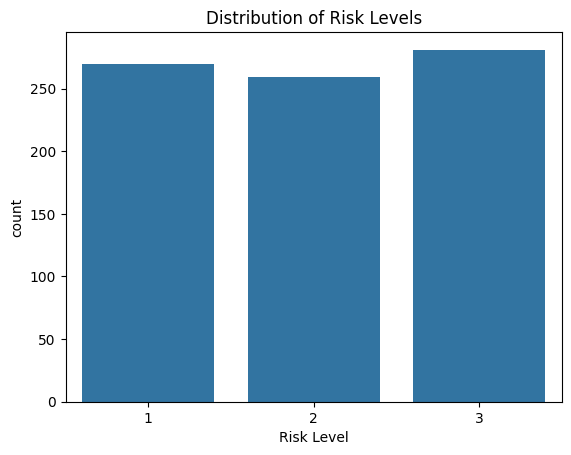

In [47]:
#This graph is used to show the count of the customers and their risk level 

sns.countplot(x='Risk Level', data=df) 
plt.title('Distribution of Risk Levels')
plt.show()

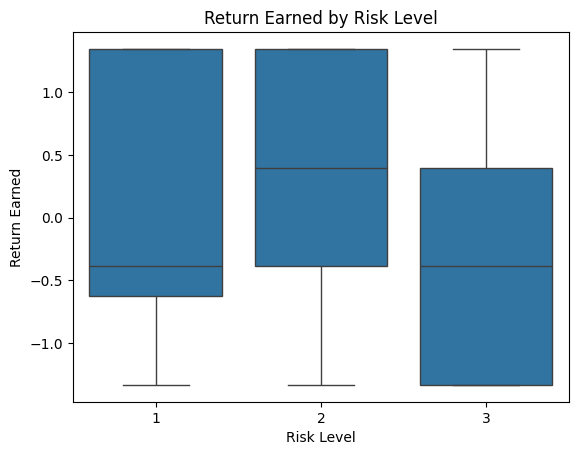

In [48]:
sns.boxplot(x='Risk Level', y='Return Earned', data=df)
plt.title('Return Earned by Risk Level')
plt.show()

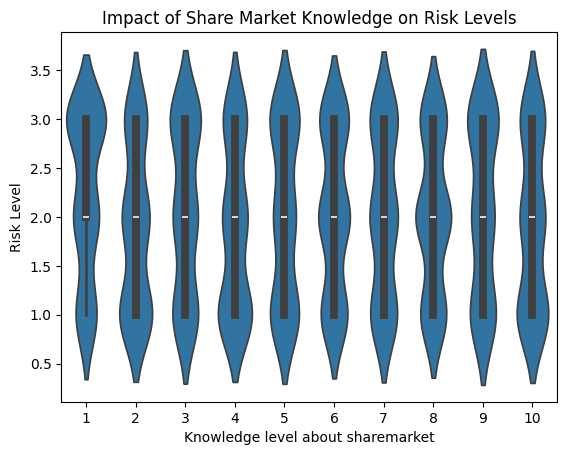

In [49]:
sns.violinplot(x='Knowledge level about sharemarket', y='Risk Level', data=df)
plt.title('Impact of Share Market Knowledge on Risk Levels')
plt.show()

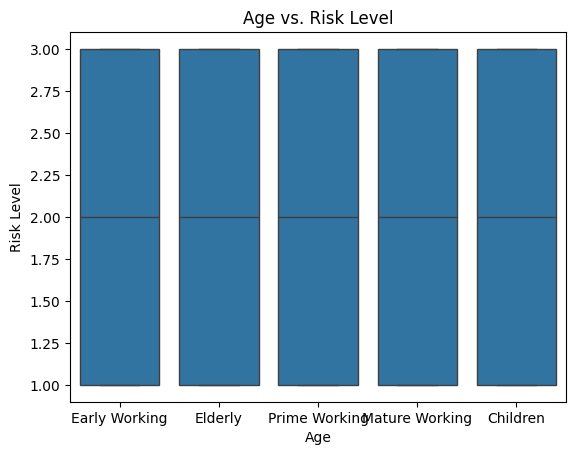

In [50]:
sns.boxplot(x='Age', y='Risk Level', data=df)
plt.title("Age vs. Risk Level")
plt.show()

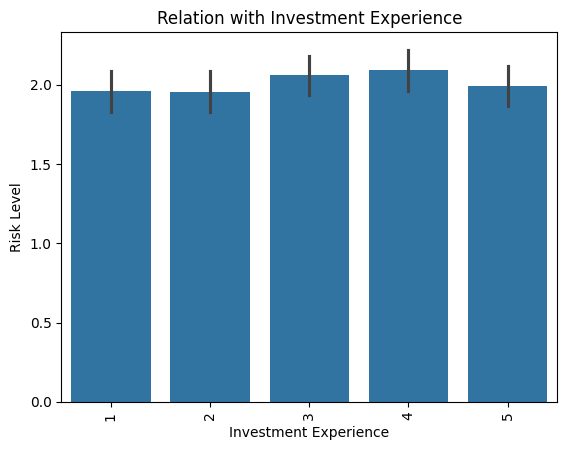

Risk Level,1,2,3
Investment Experience,,,
1,57,49,51
2,61,45,54
3,53,62,64
4,44,52,58
5,55,51,54


In [51]:
sns.barplot(x='Investment Experience', y='Risk Level', data=df)
plt.title('Relation with Investment Experience')
plt.xticks(rotation=90)
plt.show()
pd.crosstab(df['Investment Experience'], df['Risk Level'])


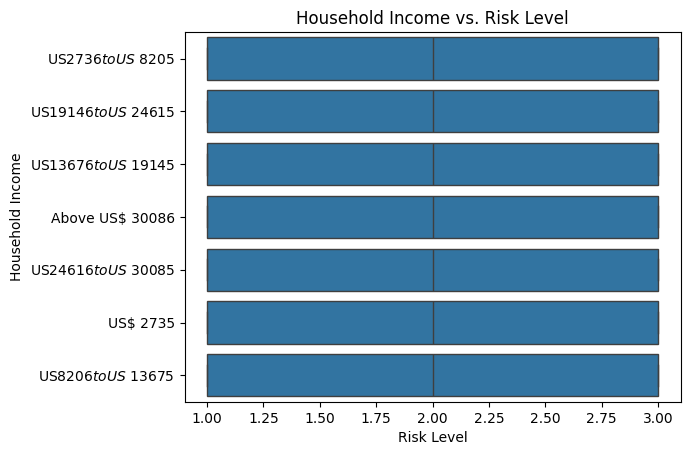

In [52]:
sns.boxplot(x='Risk Level', y='Household Income', data=df)
plt.title('Household Income vs. Risk Level')
plt.show()


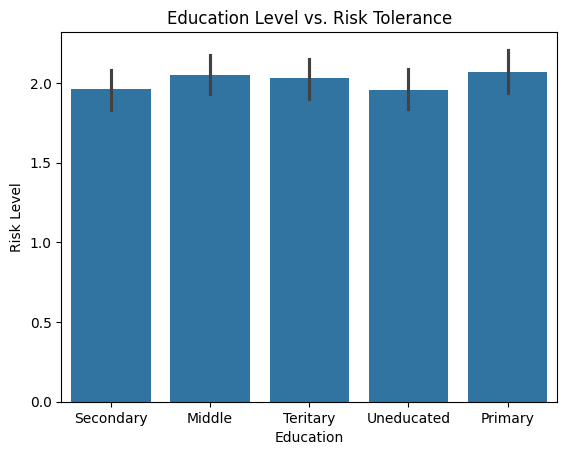

In [53]:
sns.barplot(x='Education', y='Risk Level', data=df)
plt.title('Education Level vs. Risk Tolerance')
plt.show()


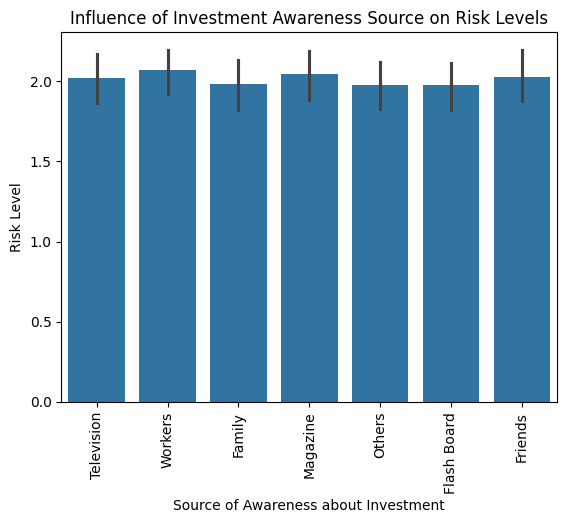

In [54]:
sns.barplot(x='Source of Awareness about Investment', y='Risk Level', data=df)
plt.title('Influence of Investment Awareness Source on Risk Levels')
plt.xticks(rotation=90)
plt.show()


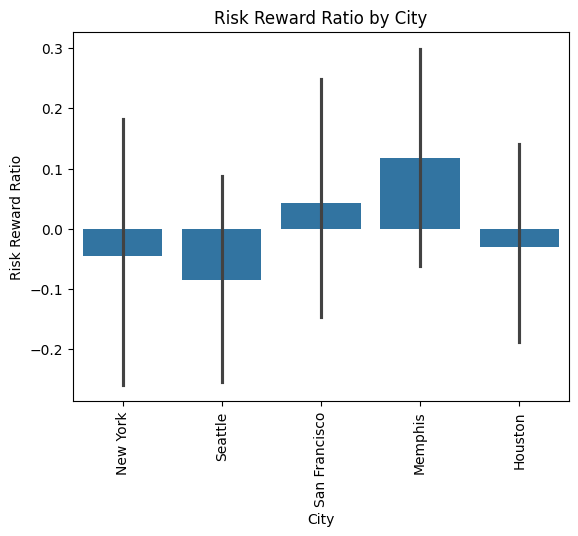

In [55]:
sns.barplot(x='City', y='Risk Reward Ratio', data=df)
plt.title('Risk Reward Ratio by City')
plt.xticks(rotation=90)
plt.show()


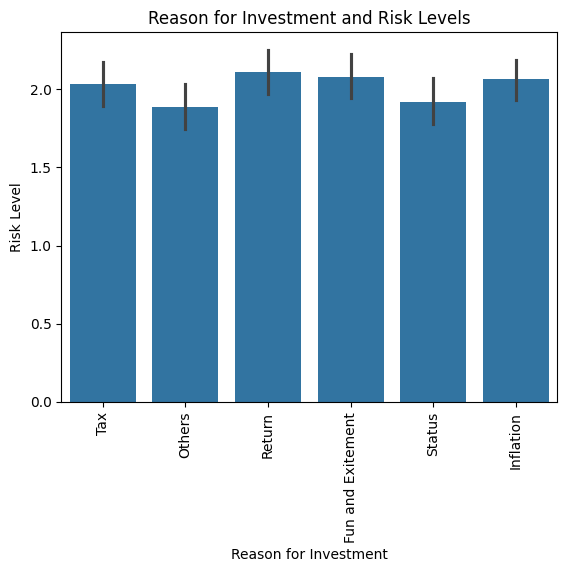

In [56]:
sns.barplot(x='Reason for Investment', y='Risk Level', data=df)
plt.title('Reason for Investment and Risk Levels')
plt.xticks(rotation=90)
plt.show()


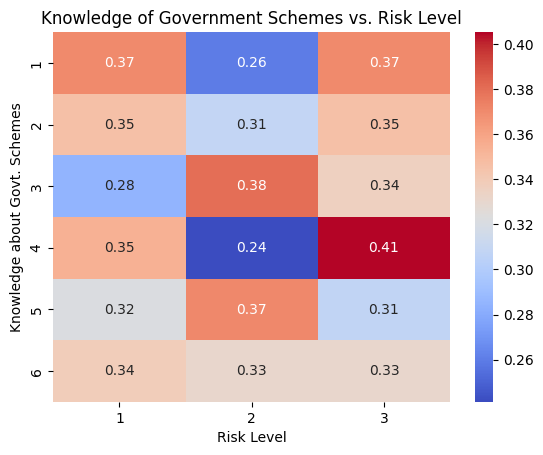

In [57]:
sns.heatmap(pd.crosstab(df['Knowledge about Govt. Schemes'], df['Risk Level'], normalize='index'), annot=True, cmap='coolwarm')
plt.title('Knowledge of Government Schemes vs. Risk Level')
plt.show()

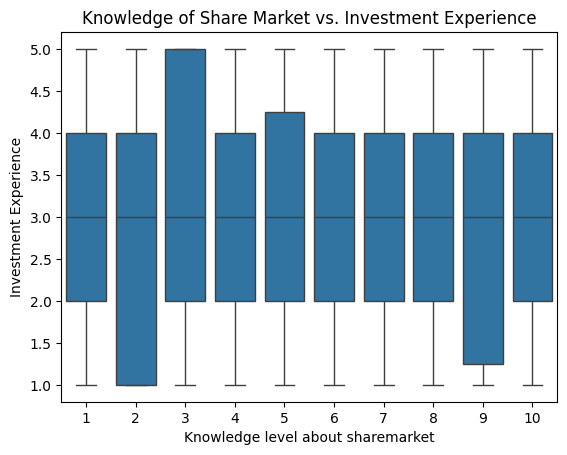

In [58]:
sns.boxplot(x='Knowledge level about sharemarket', y='Investment Experience', data=df)
plt.title('Knowledge of Share Market vs. Investment Experience')
plt.show()


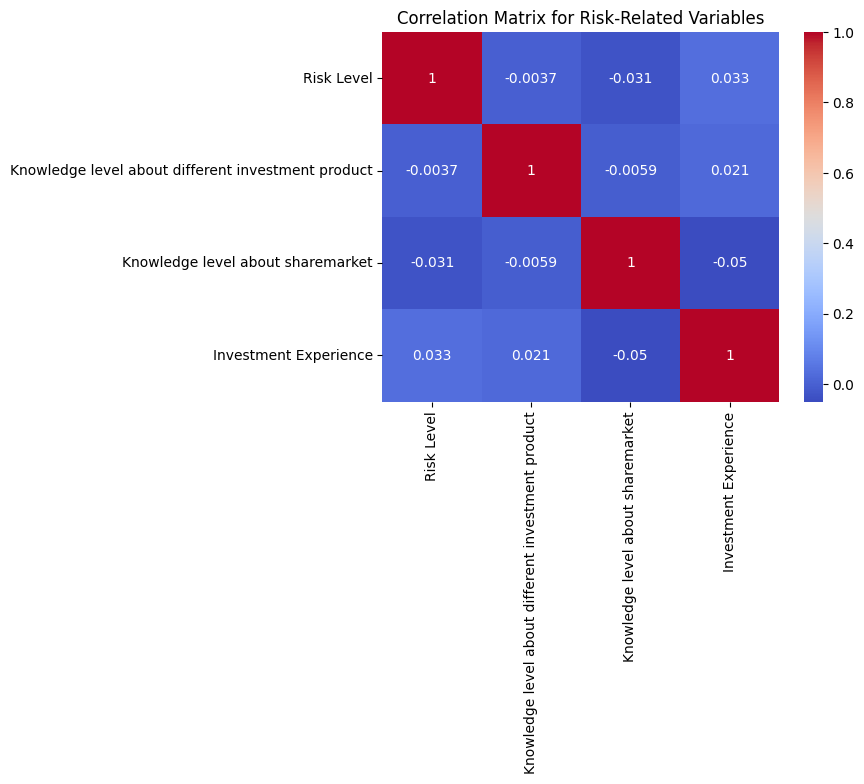

In [59]:
risk_related_cols = ['Risk Level', 'Knowledge level about different investment product', 
                     'Knowledge level about sharemarket', 'Investment Experience']
sns.heatmap(df[risk_related_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Risk-Related Variables')
plt.show()


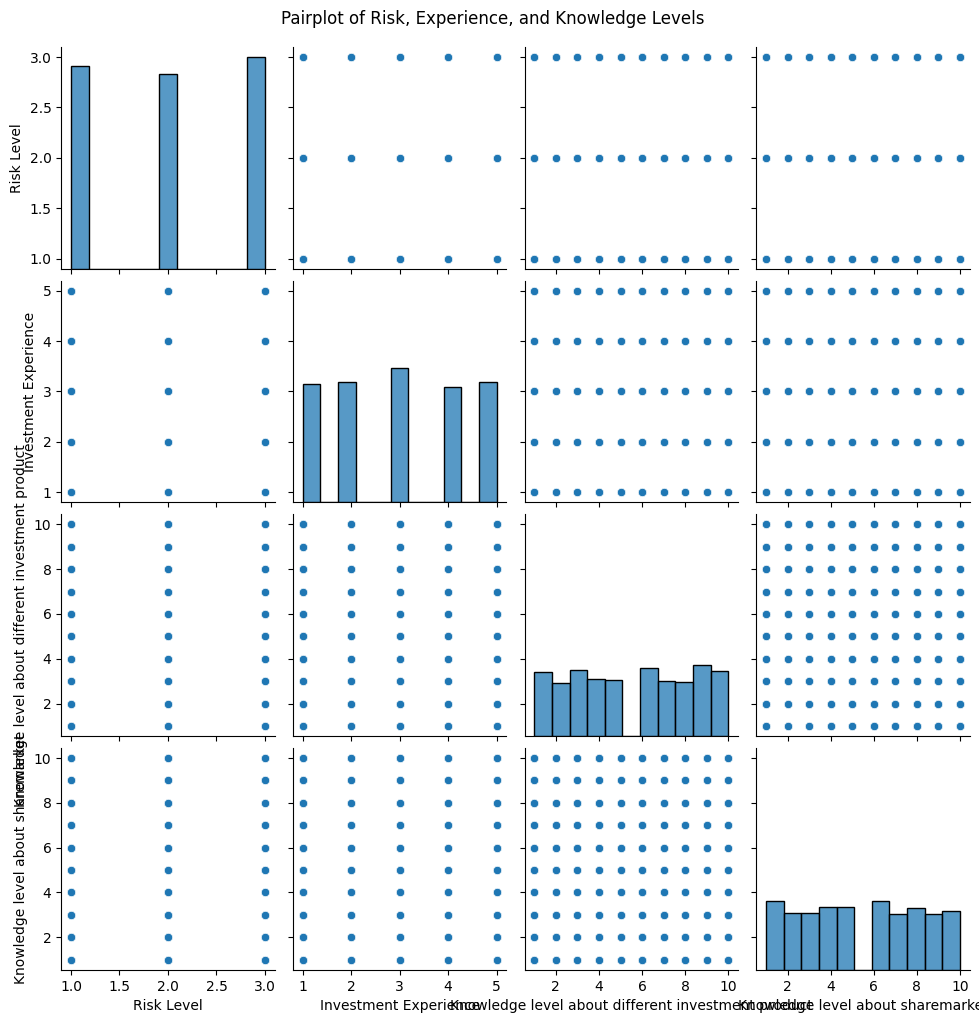

In [63]:
sns.pairplot(df[['Risk Level', 'Investment Experience', 
                 'Knowledge level about different investment product', 
                 'Knowledge level about sharemarket']])
plt.suptitle('Pairplot of Risk, Experience, and Knowledge Levels', y=1.02)
plt.show()
